# Bankruptcy Status Prediction

## Objective
Building a model to predict the bank bankruptcy status of a company given a selected 15 financial ratios.

## Content

1. Importing Libraries.
2. Exploration of Data.
3. Modelling of Data.
4. Comparing Model Performance
5. Conclusion

### About the dataset

The dataset used is the bankruptcy status, <code>(Bankrupt)</code>, of some companies collected over a period of 10 years. It contains 1321 observations with 15 financial ratios for each company. Some of the companies went bankrupt during the period (indicated by “1”), while the others survived (indicated by a “0”). All predictors are continuous and are describes below:

<code>fyear</code>: Fiscal year<br />
<code>at</code>: Assets-Total <br />
<code>Bkvlps</code>: Book value per share <br />
<code>invt:</code>: Inventories-Total<br />
<code>Lt:</code>: Liabilities-Total<br />
<code>rectr</code>: Receivables-Trade<br />
<code>cogs</code>: Costs of goods sold<br />
<code>dvt</code>: Dividends-Total<br />
<code>ebit</code>: Ernings before interest and taxes<br />
<code>gp</code>: Gross profit<br />
<code>ni</code>: Net income (Loss)<br />
<code>oiadp</code>: Operating income after depreciation <br />
<code>dvpsx_f</code>: Dividends per Share-Ex-Date-Fiscal <br />
<code>revt</code>: Revenue-Total<br />
<code>mkvalt</code>: Market value-Total-Fiscal<br />
<code>prch_f</code>: Price high-Annual-Fiscal<br />
<code>Bankrupt</code>: Bankruptcy (Response variable)<br />


## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # for creating dummy variables
from sklearn.preprocessing import MinMaxScaler # for normalising data

## 2.1 Importing Data

In [56]:
# Reading csv file into dataframe
df = pd.read_csv("bankrupt.csv")
df.head()

,fyear,at,bkvlps,invt,Lt,rectr,cogs,dvt,ebit,gp,ni,oiadp,revt,dvpsx_f,mkvalt,prch_f,Bankrupt
0,2001,9.252,1.9283,0.000,0.731,0.079,0.750,0.0,-0.379,0.442,-0.288,-0.379,1.192,0.0,10.3847,2.635,no
1,2001,20.315,0.3903,0.066,5.240,0.106,1.407,0.0,-4.481,-0.028,-4.585,-4.481,1.379,0.0,22.2900,2.140,no
2,2001,5.182,3.6446,1.558,1.501,0.193,7.638,0.0,-0.788,2.843,0.262,-0.788,10.481,0.0,3.7370,4.400,no
3,2001,1.038,0.0083,0.289,0.903,0.218,0.756,0.0,-1.361,0.632,-1.365,-1.361,1.388,0.0,18.9306,1.750,no
4,2001,10.301,0.2367,1.626,6.099,1.150,8.108,0.0,0.651,3.008,-0.175,0.651,11.116,0.0,1.3313,0.120,no


In [57]:
df.dtypes

fyear         int64
at          float64
bkvlps      float64
invt        float64
Lt          float64
rectr       float64
cogs        float64
dvt         float64
ebit        float64
gp          float64
ni          float64
oiadp       float64
revt        float64
dvpsx_f     float64
mkvalt      float64
prch_f      float64
Bankrupt     object
dtype: object

In [58]:
df.describe()

,fyear,at,bkvlps,invt,Lt,rectr,cogs,dvt,ebit,gp,ni,oiadp,revt,dvpsx_f,mkvalt,prch_f
count,1321.000000,1.321000e+03,1321.000000,1321.000000,1.321000e+03,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1.321000e+03,1321.000000
mean,2005.320212,9.511867e+03,4.543269,1908.493267,8.877328e+03,3140.169148,1251.550788,39.682273,232.908369,491.334412,-18.965758,232.908369,1742.885200,0.335449,5.774355e+03,16.149576
std,2.340608,1.120989e+05,22.073326,23675.885178,1.048727e+05,47499.012821,6013.594833,505.289521,2910.195059,3072.448546,1480.648303,2910.195059,8162.959277,3.912116,1.606149e+05,21.804876
min,2001.000000,0.000000e+00,-602.908200,0.000000,0.000000e+00,0.000000,-188.341000,-0.064000,-7655.000000,-5257.845000,-27684.000000,-7655.000000,-4234.472000,0.000000,1.000000e-04,0.005000
25%,2003.000000,1.102600e+01,0.001600,0.000000,4.869000e+00,0.301000,4.377000,0.000000,-1.774000,2.876000,-12.986000,-1.774000,10.378000,0.000000,9.444900e+00,2.050000
50%,2005.000000,2.368390e+02,2.646500,4.022000,1.212490e+02,9.483000,89.951000,0.000000,1.524000,34.181000,-0.216000,1.524000,160.478000,0.000000,6.589980e+01,8.850000
75%,2007.000000,8.664170e+02,9.351700,61.504000,7.096470e+02,79.729000,676.373000,0.854000,36.036000,210.542000,8.236000,36.036000,877.427000,0.000000,3.709207e+02,22.770000
max,2010.000000,2.187631e+06,273.671800,462103.000000,2.074033e+06,994847.000000,109794.000000,10769.000000,65332.000000,67835.000000,24728.000000,65332.000000,157333.000000,135.230000,5.820729e+06,221.000000


In [59]:
# Total missing values for each feature
df.isnull().sum()

fyear       0
at          0
bkvlps      0
invt        0
Lt          0
rectr       0
cogs        0
dvt         0
ebit        0
gp          0
ni          0
oiadp       0
revt        0
dvpsx_f     0
mkvalt      0
prch_f      0
Bankrupt    0
dtype: int64

### 2.2 Data Visualization

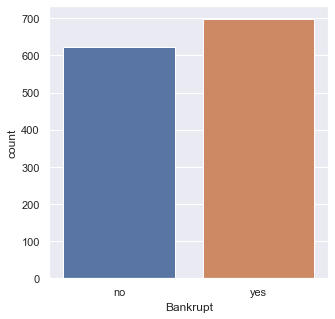

In [60]:
# Check the number of malignant(M) and benign(B) cases
sns.countplot(x="Bankrupt", data=df)

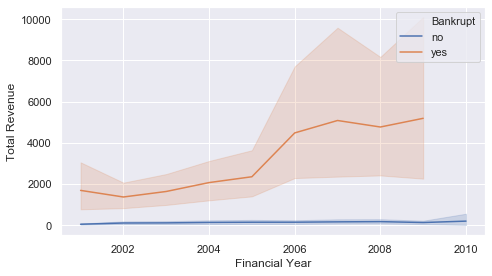

In [62]:
plt.figure(figsize=(7,4))
sns.lineplot(x="fyear", y="revt", hue="Bankrupt", data=df)
plt.xlabel('Financial Year')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

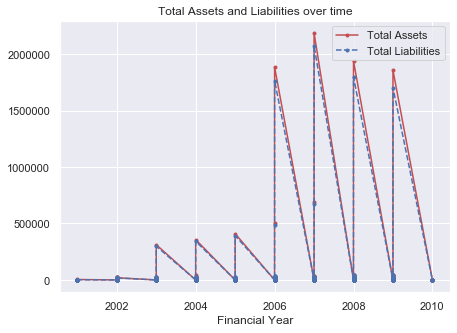

In [64]:
plt.figure(figsize=(7,5))
plt.plot(df['fyear'], df['at'], 'r.-', label="Total Assets")
plt.plot(df['fyear'], df['Lt'], 'b.--', label="Total Liabilities")
plt.title("Total Assets and Liabilities over time")
plt.xlabel('Financial Year')
plt.legend()

plt.show()

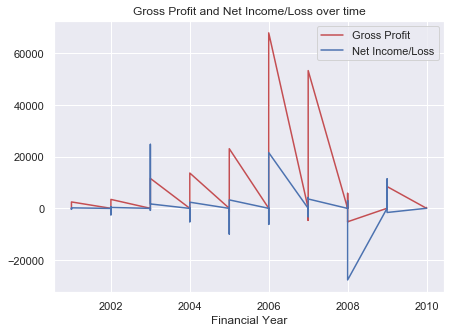

In [65]:
plt.figure(figsize=(7,5))
plt.plot(df['fyear'], df['gp'], 'r', label="Gross Profit")
plt.plot(df['fyear'], df['ni'], 'b', label="Net Income/Loss")
plt.title("Gross Profit and Net Income/Loss over time")
plt.xlabel('Financial Year')
plt.legend()

plt.show()

In [66]:
# pivot table with year as index
table = pd.pivot_table(df, values=['at', 'invt', 'Lt', 'dvt', 'gp', 'ni', 'revt', 'mkvalt'], index=['fyear'],
                    columns=['Bankrupt'], aggfunc=np.sum)
table

Lt                      at                   dvt             \
Bankrupt         no          yes         no          yes       no        yes   
fyear                                                                          
2001        271.560    15577.870    443.631    19064.191    1.014     48.469   
2002       5411.187   174010.941   7888.996   185638.536  102.947    992.843   
2003       6166.284   464128.234   8894.279   501233.968  118.359    864.434   
2004       6811.063   537117.561   9931.811   575240.185  154.654   1464.920   
2005       7363.475   572862.277  10895.659   590042.467  140.409   1514.302   
2006      11293.029  2646430.650  15771.265  2793310.408  204.276  12663.200   
2007      13627.347  3092520.486  19843.154  3283003.514  324.105  14944.142   
2008      14400.874  2151834.271  20430.817  2307083.314  487.490   9374.786   
2009      14115.602  1992820.156  19813.587  2196180.308  428.172   8577.321   
2010        186.794          NaN    465.767          NaN   14.440        NaN   

                gp                  invt                  mkvalt  \
Bankrupt        no         yes        no         yes          no   
fyear                                                              
2001        96.842    7594.583   152.265    2731.366    507.7239   
2002      1869.409   29128.771   852.103    9972.845   5124.3618   
2003      1931.306   42676.581   859.818  146890.308   7041.6313   
2004      2222.148   53103.111  1003.700  161860.144   7904.5808   
2005      2283.877   56163.345  1055.678  194143.909   7981.5826   
2006      2724.121  176201.213  1301.095  642830.642  10400.8421   
2007      2830.302  159874.957  1436.025  789352.079  11276.0332   
2008      3925.722   47918.473  1402.243  273368.223   6410.9466   
2009      2622.820   55522.493  1446.679  290420.051  10060.4554   
2010       362.684         NaN    40.433         NaN    475.0519   

                             ni                  revt              
Bankrupt           yes       no        yes         no         yes  
fyear                                                              
2001      8.220586e+03  -62.065  -1388.735    505.290   26922.318  
2002      4.117199e+04   63.758 -11135.524   7064.769  134822.920  
2003      7.656666e+04  139.587  24830.574   7526.334  153245.872  
2004      1.078318e+05  335.759 -10853.770   9125.537  179404.530  
2005      1.097551e+05  197.862 -14302.570   9569.949  197023.554  
2006      5.074795e+05  295.558  16623.107  10454.417  474333.791  
2007      4.736141e+05 -674.090   8436.757  12178.318  457005.244  
2008      3.111563e+05  259.883 -55248.823  13232.125  323773.807  
2009      5.924944e+06 -822.675  18235.819  10097.382  274735.726  
2010               NaN   15.822        NaN   1329.466         NaN

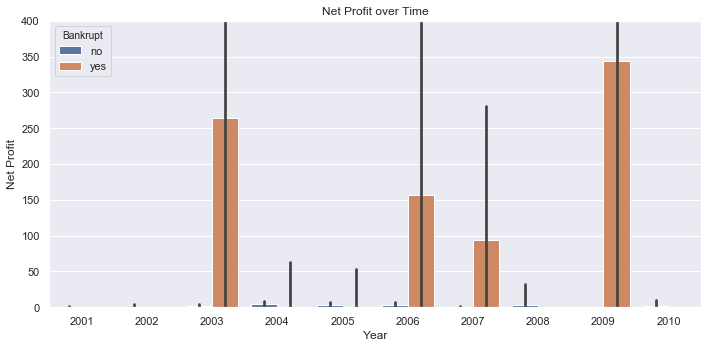

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(x = df['fyear'], y = df['ni'], hue=df['Bankrupt'])
plt.ylim(0, 400)
plt.title("Net Profit over Time")
plt.ylabel('Net Profit')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

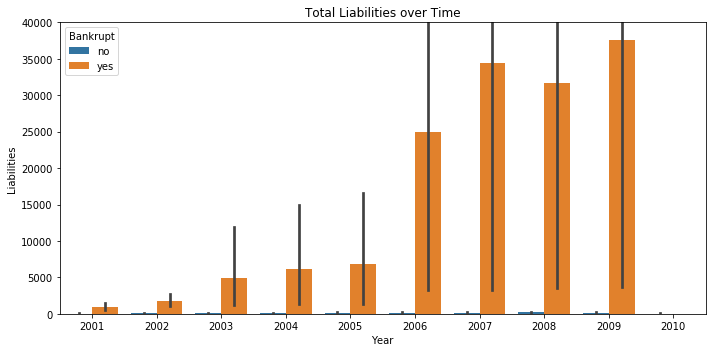

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x = df['fyear'], y = df['Lt'], hue=df['Bankrupt'])
plt.ylim(0, 40000)
plt.title("Total Liabilities over Time")
plt.ylabel('Liabilities')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

In [16]:
corr_matrix = round(df.corr(), 2)

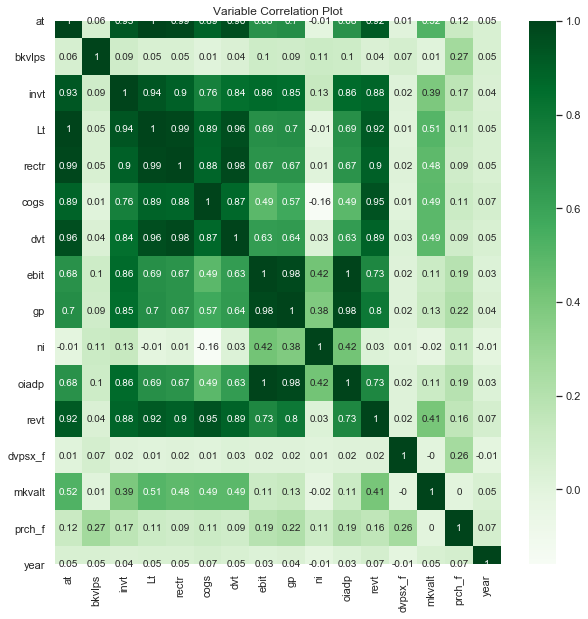

In [17]:
# heat map of correlation matrix
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(corr_matrix, cmap='Greens', annot_kws={'size': 10}, cbar = True, annot=True)
plt.title('Variable Correlation Plot')
plt.show()

In [72]:
# converting Bankrupt status to dummy variables
le = LabelEncoder()
df['Bankrupt'] = le.fit_transform(df.Bankrupt)

# deleting the year column
df2 = df.iloc[:,1:17]
df2.head()

,at,bkvlps,invt,Lt,rectr,cogs,dvt,ebit,gp,ni,oiadp,revt,dvpsx_f,mkvalt,prch_f,Bankrupt
0,9.252,1.9283,0.000,0.731,0.079,0.750,0.0,-0.379,0.442,-0.288,-0.379,1.192,0.0,10.3847,2.635,0
1,20.315,0.3903,0.066,5.240,0.106,1.407,0.0,-4.481,-0.028,-4.585,-4.481,1.379,0.0,22.2900,2.140,0
2,5.182,3.6446,1.558,1.501,0.193,7.638,0.0,-0.788,2.843,0.262,-0.788,10.481,0.0,3.7370,4.400,0
3,1.038,0.0083,0.289,0.903,0.218,0.756,0.0,-1.361,0.632,-1.365,-1.361,1.388,0.0,18.9306,1.750,0
4,10.301,0.2367,1.626,6.099,1.150,8.108,0.0,0.651,3.008,-0.175,0.651,11.116,0.0,1.3313,0.120,0


In [73]:
df2.shape

(1321, 16)

In [74]:
# splitting data into X and Y
X=df2.iloc[:,:-1]
X.head(2)

,at,bkvlps,invt,Lt,rectr,cogs,dvt,ebit,gp,ni,oiadp,revt,dvpsx_f,mkvalt,prch_f
0,9.252,1.9283,0.000,0.731,0.079,0.750,0.0,-0.379,0.442,-0.288,-0.379,1.192,0.0,10.3847,2.635
1,20.315,0.3903,0.066,5.240,0.106,1.407,0.0,-4.481,-0.028,-4.585,-4.481,1.379,0.0,22.2900,2.140


In [75]:
Y=df2.iloc[:,15]
Y.head(2)

0    0
1    0
Name: Bankrupt, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [24]:
print('Test size: ' + str(len(X_test)))
print('Train size: ' + str(len(X_train)))

Test size: 265
Train size: 1056


## 3.1 Modelling Data

In [25]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, balanced_accuracy_score, roc_curve, roc_auc_score

In [26]:
etc = ExtraTreesClassifier(n_estimators='warn',
    criterion='gini',
    random_state=100)

In [27]:
bagging = BaggingClassifier(n_estimators=1000,
    n_jobs=10,
    random_state=100,
    verbose=0)

In [28]:
nb = GaussianNB()

In [29]:
rf = RandomForestClassifier(random_state=None)

In [30]:
svm = SVC(random_state=100, C=1.0,
    kernel='rbf',
    probability=True,
    ) 

In [31]:
logit = LogisticRegression(tol=0.0001,
    random_state=10)

In [32]:
# Fitting models that does not require scaling
models_1 = [["DecisionTreeClassifier",etc],
         ["BaggingClassifier",bagging],
         ["GaussianNB",nb],
         ["RandomForestClassifier",rf]]

In [33]:
m_accuracy = []
positive_rates = []
# loop for calculating model performance
for i in models_1:
    m = i[1]
    m.fit(X_train,Y_train)
    y_predict = m.predict(X_test)
    ACC = round(accuracy_score(Y_test, y_predict), 2) 
    recall = round(recall_score(Y_test, y_predict, average='weighted'), 2) 
    B_ACC = round(balanced_accuracy_score(Y_test, y_predict), 2)
    Specificiti = round(2 * B_ACC - recall, 2)
    # predict probabilities
    probs = m.predict_proba(X_test)[:, 1]
    # calculate scores
    auc = round(roc_auc_score(Y_test, probs), 2)
    # calculate roc curves
    fpr, tpr, _ = roc_curve(Y_test, probs)
    m_accuracy.append([i[0],ACC,recall,B_ACC,Specificiti, auc])
    positive_rates.append([i[0], fpr, tpr])

C:\Users\steve\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\steve\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Due to the wide difference between the the means of the features, we will have to normalise the features for learning algorithm that computes the distance between the data points lke KNN. This includes all curve based algorithms. 

In [34]:
# instantiating scaler
scaler = MinMaxScaler()

In [35]:
# normalising data
scaler.fit(X_train)
X1 = scaler.transform(X_train)
X2 = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X1, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X2, columns=X_test.columns)
len(X_train_scaled)

1056

In [36]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    pred = knn.predict(X_test_scaled)
    acc = accuracy_score(Y_test, pred)
    # 3. append  scores for k neighbors to k_scores list
    k_scores.append(acc)
    

Text(0, 0.5, 'Cross-validated accuracy')

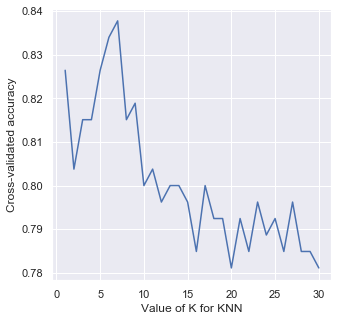

In [37]:
# plot the value of K for KNN (x-axis) versus accuracy scores (y-axis)
sns.set(rc={'figure.figsize':(5,5)})
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [38]:
#finding the best k
k_df = pd.DataFrame(k_scores, index=k_range)
best_kest = int(k_df.idxmax())
best_kest

7

In [39]:
knn = KNeighborsClassifier(n_neighbors=best_kest)

In [40]:
# Fitting models that require scaling
models_2 = [["LogisticRegression",logit],
         ["SupportVector Machine",svm],
         ["KNeighborsClassifier",knn]]

In [41]:
for i in models_2:
    m = i[1]
    m.fit(X_train_scaled, Y_train)
    y_predict = m.predict(X_test_scaled)
    ACC = round(accuracy_score(Y_test, y_predict), 2) 
    recall = round(recall_score(Y_test, y_predict, average='weighted'), 2) 
    B_ACC = round(balanced_accuracy_score(Y_test, y_predict), 2)
    Specificiti = round(2 * B_ACC - recall, 2)
    # predict probabilities
    probs = m.predict_proba(X_test_scaled)[:, 1]
    # calculate scores
    auc = round(roc_auc_score(Y_test, probs), 2)
    fpr, tpr, _ = roc_curve(Y_test, probs)
    m_accuracy.append([i[0],ACC,recall,B_ACC,Specificiti, auc])
    positive_rates.append([i[0], fpr, tpr])

C:\Users\steve\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\steve\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
performace_table = pd.DataFrame(m_accuracy)
performace_table.columns = ['Model','Accuracy', 'Recall','Bal. Accuracy','Specificity', 'AUC']
performace_table.style.bar(subset=["Accuracy",], color='#0d8ca6')\
                 .bar(subset=["Recall"], color='#50cce6')\
                 .bar(subset=["Bal. Accuracy"], color='#17990e')\
                 .bar(subset=["Specificity"], color='#6ed667')\
                 .bar(subset=["AUC"], color='#9fd4b8')

,Model,Accuracy,Recall,Bal. Accuracy,Specificity,AUC
0,DecisionTreeClassifier,0.95,0.95,0.95,0.95,0.98
1,BaggingClassifier,0.93,0.93,0.93,0.93,0.98
2,GaussianNB,0.67,0.67,0.7,0.73,0.9
3,RandomForestClassifier,0.94,0.94,0.94,0.94,0.98
4,LogisticRegression,0.68,0.68,0.68,0.68,0.76
5,SupportVector Machine,0.55,0.55,0.5,0.45,0.75
6,KNeighborsClassifier,0.84,0.84,0.84,0.84,0.89


In [43]:
roc_rates = pd.DataFrame(positive_rates)
roc_rates.columns = ['Model','fpr', 'tpr']
roc_rates

,Model,fpr,tpr
0,DecisionTreeClassifier,"[0.0, 0.0, 0.008403361344537815, 0.00840336134...","[0.0, 0.5342465753424658, 0.7671232876712328, ..."
1,BaggingClassifier,"[0.0, 0.0, 0.0, 0.008403361344537815, 0.008403...","[0.0, 0.21232876712328766, 0.2602739726027397,..."
2,GaussianNB,"[0.0, 0.0, 0.0, 0.01680672268907563, 0.0168067...","[0.0, 0.3835616438356164, 0.3972602739726027, ..."
3,RandomForestClassifier,"[0.0, 0.008403361344537815, 0.0084033613445378...","[0.0, 0.541095890410959, 0.7465753424657534, 0..."
4,LogisticRegression,"[0.0, 0.0, 0.0, 0.025210084033613446, 0.025210...","[0.0, 0.00684931506849315, 0.0136986301369863,..."
5,SupportVector Machine,"[0.0, 0.0, 0.008403361344537815, 0.00840336134...","[0.0, 0.00684931506849315, 0.00684931506849315..."
6,KNeighborsClassifier,"[0.0, 0.008403361344537815, 0.0588235294117647...","[0.0, 0.4246575342465753, 0.6095890410958904, ..."


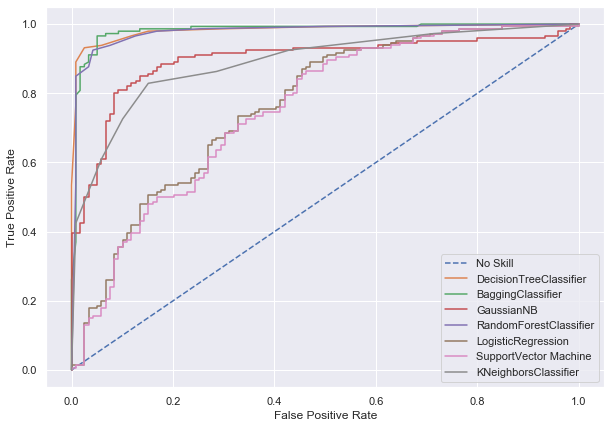

In [51]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]
ns_auc = roc_auc_score(Y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)

# plot the roc curve for the model
plt.figure(figsize=(10,7))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(roc_rates.iloc[0,1], roc_rates.iloc[0,2], label=roc_rates.iloc[0,0])
plt.plot(roc_rates.iloc[1,1], roc_rates.iloc[1,2], label=roc_rates.iloc[1,0])
plt.plot(roc_rates.iloc[2,1], roc_rates.iloc[2,2], label=roc_rates.iloc[2,0])
plt.plot(roc_rates.iloc[3,1], roc_rates.iloc[3,2], label=roc_rates.iloc[3,0])
plt.plot(roc_rates.iloc[4,1], roc_rates.iloc[4,2], label=roc_rates.iloc[4,0])
plt.plot(roc_rates.iloc[5,1], roc_rates.iloc[5,2], label=roc_rates.iloc[5,0])
plt.plot(roc_rates.iloc[6,1], roc_rates.iloc[6,2], label=roc_rates.iloc[6,0])

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree Classifyer achieved the highest AUC and Accuracy.